# trainTWO model8_SPRING

WITH SENTENCE : 봄바람에 꽃잎도 방긋방긋 웃으며

springTWO = {0:'season', 1:'warm', 2:'wind', 3:'because_1', 4:'because_2', 5:'flower', 6:'together', 7:'bright', 8:'smile'}

- springTWO.h5(1): 200/200/200/200/200/200/200/200/200 // epoch=100 // acc:100%
- springTWO.h5(2): 400/400/400/400/400/400/400/400/400 // epoch=50 // acc:98%
- springTWO.h5(3): 600/600/600/600/600/600/600/600/600 // epoch=30 // acc:99%
- springTWO.h5(4): 800/800/800/800/800/800/800/800/800 // epoch=50 // acc:98%
- springTWO.h5(5): 1000/800/1000/800/800/800/800/800/800 // epoch=50 // acc:100%

In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#드라이브에 접근할 수 있도록 아래 코드 입력
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from itertools import chain

springTWO = {0:'season', 1:'warm', 2:'wind', 3:'because_1', 4:'because_2', 5:'flower', 6:'together', 7:'bright', 8:'smile'}
actions = []

for v in springTWO.values():
    actions.append(v)
print(actions)

['season', 'warm', 'wind', 'because_1', 'because_2', 'flower', 'together', 'bright', 'smile']


In [4]:
data = np.concatenate([
                       # because_1 : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_1_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_1_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_1_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_1_1636367377.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_1_1636368206.npy'),
                       # because_2 : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_2_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_2_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_2_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_because_2_1636367377.npy'),
                       # bright : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_bright_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_bright_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_bright_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_bright_1636367377.npy'),
                       # flower : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_flower_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_flower_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_flower_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_flower_1636367377.npy'),
                       # season : 1000
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_season_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_season_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_season_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_season_1636367377.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_season_1636368206.npy'),
                       # smile : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_smile_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_smile_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_smile_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_smile_1636367377.npy'),
                       # together : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_together_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_together_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_together_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_together_1636367377.npy'),
                       # warm : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_warm_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_warm_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_warm_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_warm_1636367377.npy'),
                       # wind : 800
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_wind_1636033559.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_wind_1636365787.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_wind_1636366639.npy'),
                       np.load('/content/drive/MyDrive/SOOWA/datasetTWO/modelTWO8/springTWO/two_SL_wind_1636367377.npy')
], axis=0)

data.shape

(7220, 10, 144)

In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(7220, 10, 143)
(7220,)


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7220, 9)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(6498, 10, 143) (6498, 9)
(722, 10, 143) (722, 9)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                53248     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 55,625
Trainable params: 55,625
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/50
204/204 [==============================] - 3s 7ms/step - loss: 19.3551 - acc: 0.3937 - val_loss: 1.6676 - val_acc: 0.6108

Epoch 00001: val_acc improved from -inf to 0.61080, saving model to models/model.h5
Epoch 2/50
204/204 [==============================] - 1s 6ms/step - loss: 1.2236 - acc: 0.7038 - val_loss: 1.0142 - val_acc: 0.7147

Epoch 00002: val_acc improved from 0.61080 to 0.71468, saving model to models/model.h5
Epoch 3/50
204/204 [==============================] - 1s 6ms/step - loss: 0.7651 - acc: 0.7782 - val_loss: 0.6876 - val_acc: 0.8116

Epoch 00003: val_acc improved from 0.71468 to 0.81163, saving model to models/model.h5
Epoch 4/50
204/204 [==============================] - 1s 6ms/step - loss: 0.5453 - acc: 0.8283 - val_loss: 0.4920 - val_acc: 0.8283

Epoch 00004: val_acc improved from 0.81163 to 0.82825, saving model to models/model.h5
Epoch 5/50
204/204 [==============================] - 1s 6ms/step - loss: 0.4605 - acc: 0.8495 - val_loss: 0.5267 - val_ac

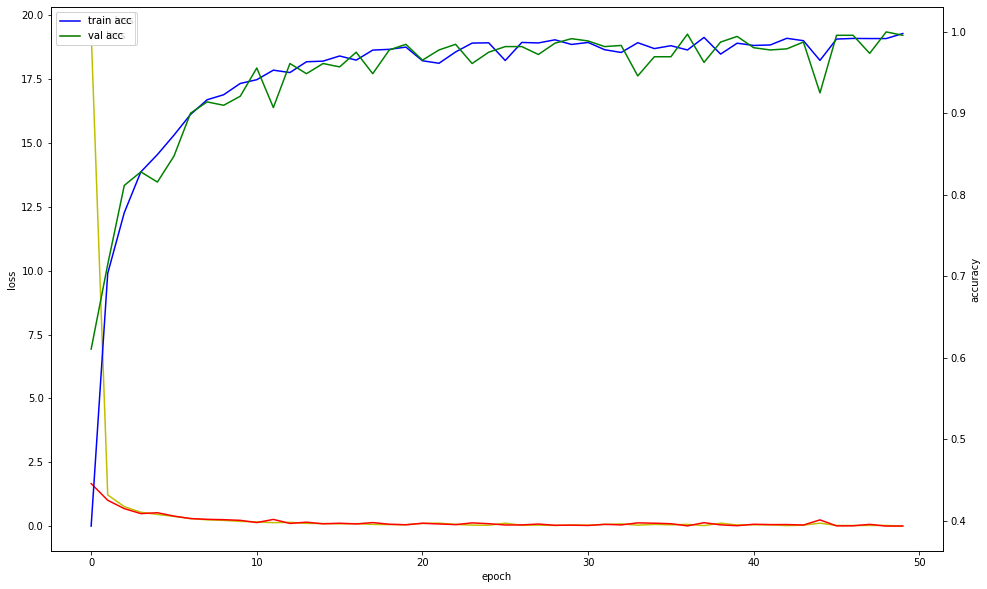

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[623,   0],
        [  0,  99]],

       [[650,   0],
        [  0,  72]],

       [[636,   0],
        [  0,  86]],

       [[622,   0],
        [  0, 100]],

       [[646,   0],
        [  0,  76]],

       [[648,   0],
        [  0,  74]],

       [[656,   0],
        [  0,  66]],

       [[654,   0],
        [  0,  68]],

       [[641,   0],
        [  0,  81]]])

In [12]:
from keras.models import load_model

model.save('springTWO_5.h5')

from google.colab import files
files.download('springTWO_5.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>